In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_and_inspect_data(predictor_path, response_path):
    # Load the datasets
    X = pd.read_csv(predictor_path, header=None)
    y = pd.read_csv(response_path, header=None)
    
    # Inspect the datasets
    print("Predictor Data (X) Head:")
    print(X.head())
    print("\nResponse Data (y) Head:")
    print(y.head())
    
    # Check for missing values
    print("\nMissing values in Predictor Data (X):")
    print(X.isnull().sum())
    print("\nMissing values in Response Data (y):")
    print(y.isnull().sum())
    
    return X, y

In [3]:
def normalize_data(X):
    # Normalize the predictor variable
    X_normalized = (X - X.mean()) / X.std()
    return X_normalized

In [4]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [5]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta -= (alpha / m) * X.T.dot(errors)
        cost_history[i] = compute_cost(X, y, theta)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost_history[i]}")
    
    return theta, cost_history

In [6]:
def stochastic_gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        for j in range(m):
            rand_index = np.random.randint(0, m)
            X_i = X[rand_index, :].reshape(1, X.shape[1])
            y_i = y.iloc[rand_index].values.reshape(1, 1)
            prediction = X_i.dot(theta)
            error = prediction - y_i
            theta -= alpha * X_i.T.dot(error)
        
        cost_history[i] = compute_cost(X, y, theta)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost_history[i]}")
    
    return theta, cost_history

In [7]:
def mini_batch_gradient_descent(X, y, theta, alpha, num_iterations, batch_size):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y.iloc[indices].values
        
        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]
            predictions = X_batch.dot(theta)
            errors = predictions - y_batch
            theta -= (alpha / batch_size) * X_batch.T.dot(errors)
        
        cost_history[i] = compute_cost(X, y, theta)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost_history[i]}")
    
    return theta, cost_history

In [8]:
predictor_path = "./linearX.csv"
response_path = "./linearY.csv"

X, y = load_and_inspect_data(predictor_path, response_path)
X_normalized = normalize_data(X)

# Add intercept term to X
X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

# Initialize parameters
theta = np.zeros((X_normalized.shape[1], 1))
alpha = 0.5
num_iterations = 1000
batch_size = 20

# Batch Gradient Descent
theta_bgd, cost_history_bgd = gradient_descent(X_normalized, y, theta.copy(), alpha, num_iterations)

# Stochastic Gradient Descent
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_normalized, y, theta.copy(), alpha, num_iterations)

# Mini-Batch Gradient Descent
theta_mbgd, cost_history_mbgd = mini_batch_gradient_descent(X_normalized, y, theta.copy(), alpha, num_iterations, batch_size)

Predictor Data (X) Head:
     0
0  9.1
1  8.0
2  9.1
3  8.4
4  6.9

Response Data (y) Head:
         0
0  0.99523
1  0.99007
2  0.99769
3  0.99386
4  0.99508

Missing values in Predictor Data (X):
0    0
dtype: int64

Missing values in Response Data (y):
0    0
dtype: int64
Iteration 0: Cost 0.12415787678374811
Iteration 100: Cost 1.1947898109836605e-06
Iteration 200: Cost 1.1947898109836605e-06
Iteration 300: Cost 1.1947898109836605e-06
Iteration 400: Cost 1.1947898109836605e-06
Iteration 500: Cost 1.1947898109836605e-06
Iteration 600: Cost 1.1947898109836605e-06
Iteration 700: Cost 1.1947898109836605e-06
Iteration 800: Cost 1.1947898109836605e-06
Iteration 900: Cost 1.1947898109836605e-06
Iteration 0: Cost 1.3778211181726178e-06
Iteration 100: Cost 1.843636151648141e-06
Iteration 200: Cost 1.8270967881465147e-06
Iteration 300: Cost 1.457915410223817e-06
Iteration 400: Cost 1.78213760140292e-06
Iteration 500: Cost 1.942823290131678e-06
Iteration 600: Cost 1.6830091597781695e-06
Iterat

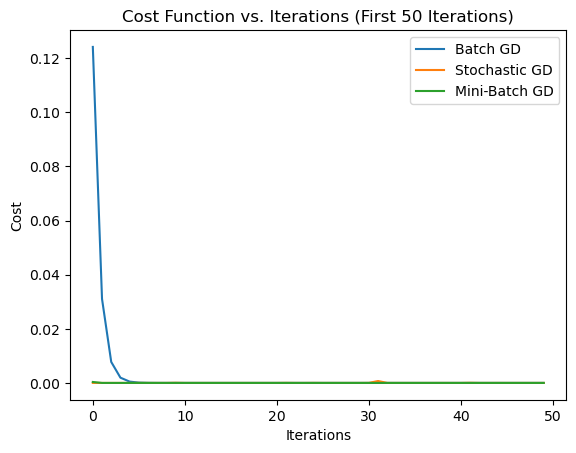

In [9]:
# Plot Cost Function vs. Iterations for all methods
plt.plot(range(50), cost_history_bgd[:50], label='Batch GD')
plt.plot(range(50), cost_history_sgd[:50], label='Stochastic GD')
plt.plot(range(50), cost_history_mbgd[:50], label='Mini-Batch GD')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations (First 50 Iterations)')
plt.legend()
plt.show()

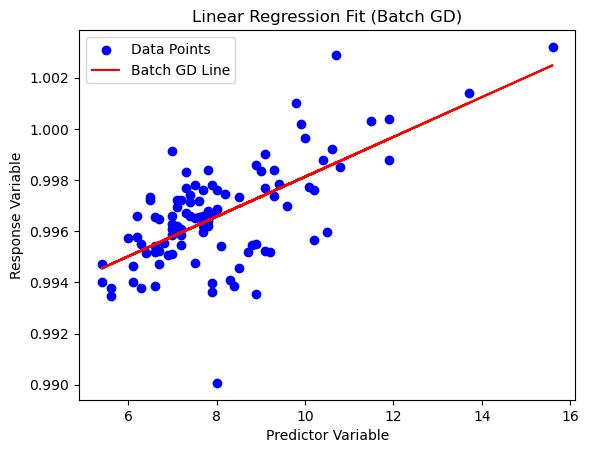

In [10]:
# Visualize the results for Batch Gradient Descent
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, X_normalized.dot(theta_bgd), color='red', label='Batch GD Line')
plt.xlabel('Predictor Variable')
plt.ylabel('Response Variable')
plt.title('Linear Regression Fit (Batch GD)')
plt.legend()
plt.show()

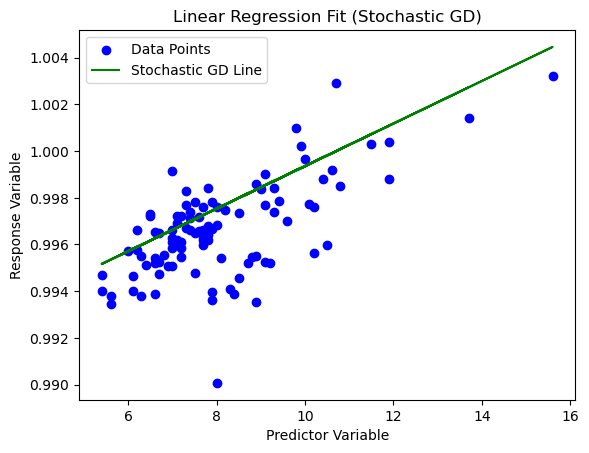

In [11]:
# Visualize the results for Stochastic Gradient Descent
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, X_normalized.dot(theta_sgd), color='green', label='Stochastic GD Line')
plt.xlabel('Predictor Variable')
plt.ylabel('Response Variable')
plt.title('Linear Regression Fit (Stochastic GD)')
plt.legend()
plt.show()

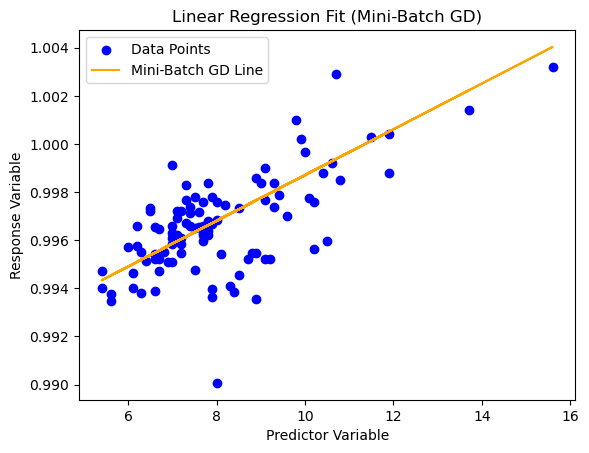

In [12]:
# Visualize the results for Mini-Batch Gradient Descent
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, X_normalized.dot(theta_mbgd), color='orange', label='Mini-Batch GD Line')
plt.xlabel('Predictor Variable')
plt.ylabel('Response Variable')
plt.title('Linear Regression Fit (Mini-Batch GD)')
plt.legend()
plt.show()